In [10]:
import sklearn
import pandas
import numpy as np
import sys
from numpy import genfromtxt
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import KFold

### Splitting up the test data 
* one array containing the parameters (X)
* one with the output (y)
* Used to find intial examples of (w) 
    
This will put together the expression:

\begin{align}
    min_w ||Xw-y||^2 + \alpha ||w||^2
\end{align}


In [11]:
#import csv file 
# wineQualityRed = csv.reader(open('winequality-red.csv', newline=''), delimiter=';', quotechar='"')
redDat = genfromtxt('winequality-red.csv', delimiter=';', dtype = float)[1:]
whiDat = genfromtxt('winequality-white.csv', delimiter=';', dtype = float)[1:]

# wineQualityRed = list(map(Wine, wineQualityRed[1:]))
# print(redDat[0])
# print(whiDat[0])

#seperate the output from the parameters
X = [[0 for x in range(11)] for y in range(whiDat.__len__())]
y = [0 for x in range(whiDat.__len__())]
for i in range (0, whiDat.__len__() -1):
    X[i] = whiDat[i][0:11]
    y[i] = whiDat[i][11]

### Original check to see what value results from  alpha = 0.5

In [3]:
reg = linear_model.Ridge (alpha = .5)
reg.fit (X[:4897], y[:4897]) #had to force the index because it kept going too high 
W = reg.coef_
print(W)

[-4.96191718e-02 -1.94145511e+00 -2.89646195e-02  2.58647463e-02
 -7.68993360e-01  4.79270351e-03 -8.87416733e-04 -4.69163696e-01
  1.69550103e-01  4.16308308e-01  3.63125126e-01]


### Analyse the effect of alpha on the resulting weight vector

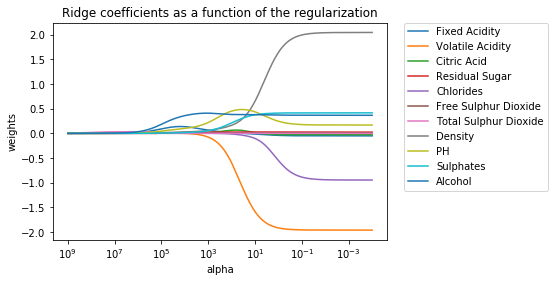

In [4]:
# Compute paths
# #############################################################################
n_alphas = 500
alphas = np.logspace(-4, 9, n_alphas)
# Array for containg the perameters 1-11
#--------0--1--2--3--4--5--6--7--8--9--10
coefs = [[],[],[],[],[],[],[],[],[],[],[]]

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit (X[:4897], y[:4897])
    for x in range(0, 11):
        coefs[x].append(ridge.coef_[x])

# #############################################################################
# Display results
ax = plt.gca()
#attatch key to each set of coeficients
plt.plot(alphas, coefs[0], label = "Fixed Acidity")
plt.plot(alphas, coefs[1], label = "Volatile Acidity")
plt.plot(alphas, coefs[2], label = "Citric Acid")
plt.plot(alphas, coefs[3], label = "Residual Sugar")
plt.plot(alphas, coefs[4], label = "Chlorides")
plt.plot(alphas, coefs[5], label = "Free Sulphur Dioxide")
plt.plot(alphas, coefs[6], label = "Total Sulphur Dioxide")
plt.plot(alphas, coefs[7], label = "Density")
plt.plot(alphas, coefs[8], label = "PH")
plt.plot(alphas, coefs[9], label = "Sulphates")
plt.plot(alphas, coefs[10], label = "Alcohol")
#--------------------------------------------#
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
#plot the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Find the most appropriate alpha using cross validation

In [76]:

n_alphas = 500
alphas = np.logspace(-4, 9, n_alphas)
ridgeCv = linear_model.RidgeCV(alphas=alphas, fit_intercept = False)
ridgeCv.fit (X[:4897], y[:4897])
print(ridgeCv.coef_)
print(ridgeCv.alpha_)
print(ridgeCv.score(X,y))




[-4.79446860e-02 -1.94902355e+00 -2.86842970e-02  2.52427896e-02
 -8.18038547e-01  4.81951382e-03 -8.85992078e-04  1.93065621e+00
  1.89431506e-01  4.14428304e-01  3.67196408e-01]
0.22946763672319362
0.27898051690580056


In [84]:
n_alphas = 500
alphas = np.logspace(-4, 9, n_alphas)
ridgeCv = linear_model.RidgeCV(alphas=alphas, fit_intercept = False, cv = 10)
ridgeCv.fit (X[:4897], y[:4897])
print(ridgeCv.coef_)
print(ridgeCv.alpha_)
print(ridgeCv.score(X,y))

[-4.70647375e-02 -1.94550236e+00 -2.85281965e-02  2.53256296e-02
 -7.80361658e-01  4.83010490e-03 -8.88931570e-04  1.89479960e+00
  1.96184914e-01  4.14043687e-01  3.67670522e-01]
0.30972906673314066


AttributeError: 'RidgeCV' object has no attribute 'cv_values_'

In [86]:
n_alphas = 500
alphas = np.logspace(-4, 9, n_alphas)
ridgeCv = linear_model.RidgeCV(alphas=alphas, fit_intercept = True, cv = 10)
ridgeCv.fit (X[:4897], y[:4897])
print(ridgeCv.coef_)
print(ridgeCv.alpha_)
print(ridgeCv.score(X,y))

[ 3.82626315e-02 -1.88588842e+00  1.06996400e-02  6.83829396e-02
 -4.15809614e-01  3.97219703e-03 -4.21949385e-04 -1.15057908e+02
  5.64200966e-01  5.80768249e-01  2.33153238e-01]
0.00047572361391878896
-3.1527702054598867


In [87]:
print(ridgeCv.intercept_)

115.4729159455945


In [85]:
print(ridgeCv.score(X,y))

0.27896603728403846


### Plot this to see how the weights are chosen relative to eachother 

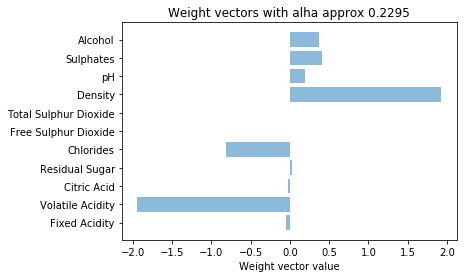

In [19]:
objects = ('Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulphur Dioxide', 'Total Sulphur Dioxide','Density','pH','Sulphates','Alcohol')
ax = plt.gca()
y_pos = np.arange(len(objects))

plt.barh(y_pos, ridgeCv.coef_, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Weight vector value')
plt.title('Weight vectors with alha approx 0.2295')
plt.axis('tight')
 
plt.show()

### split the test and training data using 10 fold 

In [71]:
# X_train, X_test, y_train, y_test = train_test_split(whiDatX[:4897], whiDatY[:4897], test_size = 0.4, random_state = 0)

tenFold = KFold(n_splits = 10)
tenFold.get_n_splits(X)
c = 1
clfScores = []
clfCoef = []
print(tenFold)
print("TRAIN: 0 -> 4897")
print("Emmitting TEST each time")
for train_index, test_index in tenFold.split(X, y):
    print("TEST", c , ":" , test_index[0], "->", test_index[test_index.__len__()-1])
    X_train, X_test = np.delete(np.array(X), test_index, axis =0), np.delete(np.array(X), train_index, axis =0)
    y_train, y_test = np.delete(np.array(y), test_index, axis =0), np.delete(np.array(y), train_index, axis =0)
    clf = svm.SVR(kernel='linear', C=1, epsilon = 0.5).fit(X_train, y_train)
    clfScores.append(clf.score(X_test, y_test))
    clfCoef.append(clf.coef_)
    c = c+1

np.mean(clfScores, axis =0)

KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: 0 -> 4897
Emmitting TEST each time
TEST 1 : 0 -> 489
TEST 2 : 490 -> 979
TEST 3 : 980 -> 1469
TEST 4 : 1470 -> 1959
TEST 5 : 1960 -> 2449
TEST 6 : 2450 -> 2939
TEST 7 : 2940 -> 3429
TEST 8 : 3430 -> 3919
TEST 9 : 3920 -> 4408
TEST 10 : 4409 -> 4897


0.2489809012676575

Display all the weights for the tests on a graph and average them

In [72]:
print(clfScores)
print(clfCoef)

[0.21506790667596928, 0.17808433792441625, 0.25593712586101436, 0.3176329987480333, 0.17044121384477062, 0.3508586600500412, 0.24689023134355234, 0.3475397225631359, 0.16998187743004778, 0.23737493823559408]
[array([[-4.12147418e-02, -1.57271795e+00,  5.94159975e-02,
         2.17936047e-02, -2.90963332e-01,  6.27734502e-03,
        -1.05986568e-03,  8.14758660e-01,  2.65063225e-02,
         3.63699316e-01,  3.81943192e-01]]), array([[-6.12317670e-02, -1.40473227e+00,  1.52995551e-01,
         1.85554626e-02, -2.49275943e-01,  5.70755264e-03,
        -9.53538096e-04,  8.25533230e-01, -3.73549827e-02,
         3.57534688e-01,  3.74087589e-01]]), array([[-5.75591367e-02, -1.40549602e+00,  1.02854413e-01,
         1.67890349e-02, -2.51543840e-01,  5.55581532e-03,
        -1.22953628e-03,  8.14097261e-01,  2.83880925e-02,
         4.50465218e-01,  3.65114643e-01]]), array([[-5.17613517e-02, -1.42925799e+00,  8.10008340e-02,
         1.52181756e-02, -4.68279829e-01,  5.70888110e-03,
       

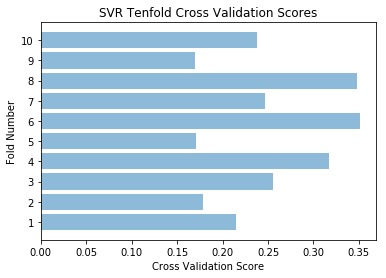

In [92]:
folds = ('1', '2', '3', '4', '5', '6','7','8','9','10')
ax = plt.gca()
y_pos = np.arange(len(folds))

plt.barh(y_pos, clfScores, align='center', alpha=0.5)
plt.yticks(y_pos, folds)
plt.xlabel('Cross Validation Score')
plt.ylabel('Fold Number')
plt.title('SVR Tenfold Cross Validation Scores')
plt.axis('tight')
 
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
clf_1 = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf_1, X, y, cv=tenFold, n_jobs=-1)
scores

NameError: name 'tenFold' is not defined

In [ ]:
#split the data 70:30
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=true)
#generate predictors with all the different alphas around the range of the base alpha prediction
no_alphas = 30;
alphas = np.logspace(-4, 9, no_alphas)

#use each in cross validation 


 
for a in alphas
    ten_Folder = KFold(n_splits = 10)
    ten_Folder.get_n_splits(X_tr)
    c = 1
    regScores = []
    print(ten_Folder)
    print("TRAIN: 0 ->" + X_tr.__len__())
    print("Emmitting TEST each time")
    for train_index, test_index in tenFolder.split(X_tr, y_tr):
        print("TEST", c , ":" , test_index[0], "->", test_index[test_index.__len__()-1])
        X_train, X_test = np.delete(np.array(X), test_index, axis =0), np.delete(np.array(X), train_index, axis =0)
        y_train, y_test = np.delete(np.array(y), test_index, axis =0), np.delete(np.array(y), train_index, axis =0)
        regg = reg = linear_model.Ridge (alpha = a).fit(X_train, y_train)
        regScores.append(clf.score(X_test, y_test))
        c = c+1

